# Scraping Top Repositories for Topics on GitHub

### url that we are going to scrap `https://github.com/topics`

agenda: - To get a list of topics and store them into dataframe.

For this purpose, I will use beautiful soup and request library to parse the html code and retrieve data from the webpage accordingly.

In [16]:
#importing libraries
import requests
from bs4 import BeautifulSoup as bs
import re
import os
import pandas as pd

In [43]:
def get_topics_page():   
    topics_url = "https://github.com/topics"
    response = requests.get(topics_url)
    #checking for status code
    if response.status_code !=200:
        raise Exception("failed to load page {}.".format(topics_url))
    doc = bs(response.content,"html.parser") 
    return doc

in this first step we have extracted the html code of the webpage. Now we can use beatuful soups operations to extract the required content out of it.

In [44]:
doc = get_topics_page()

Now creating some helper functions in parsing the data.

To get the topic name we can use p tag.
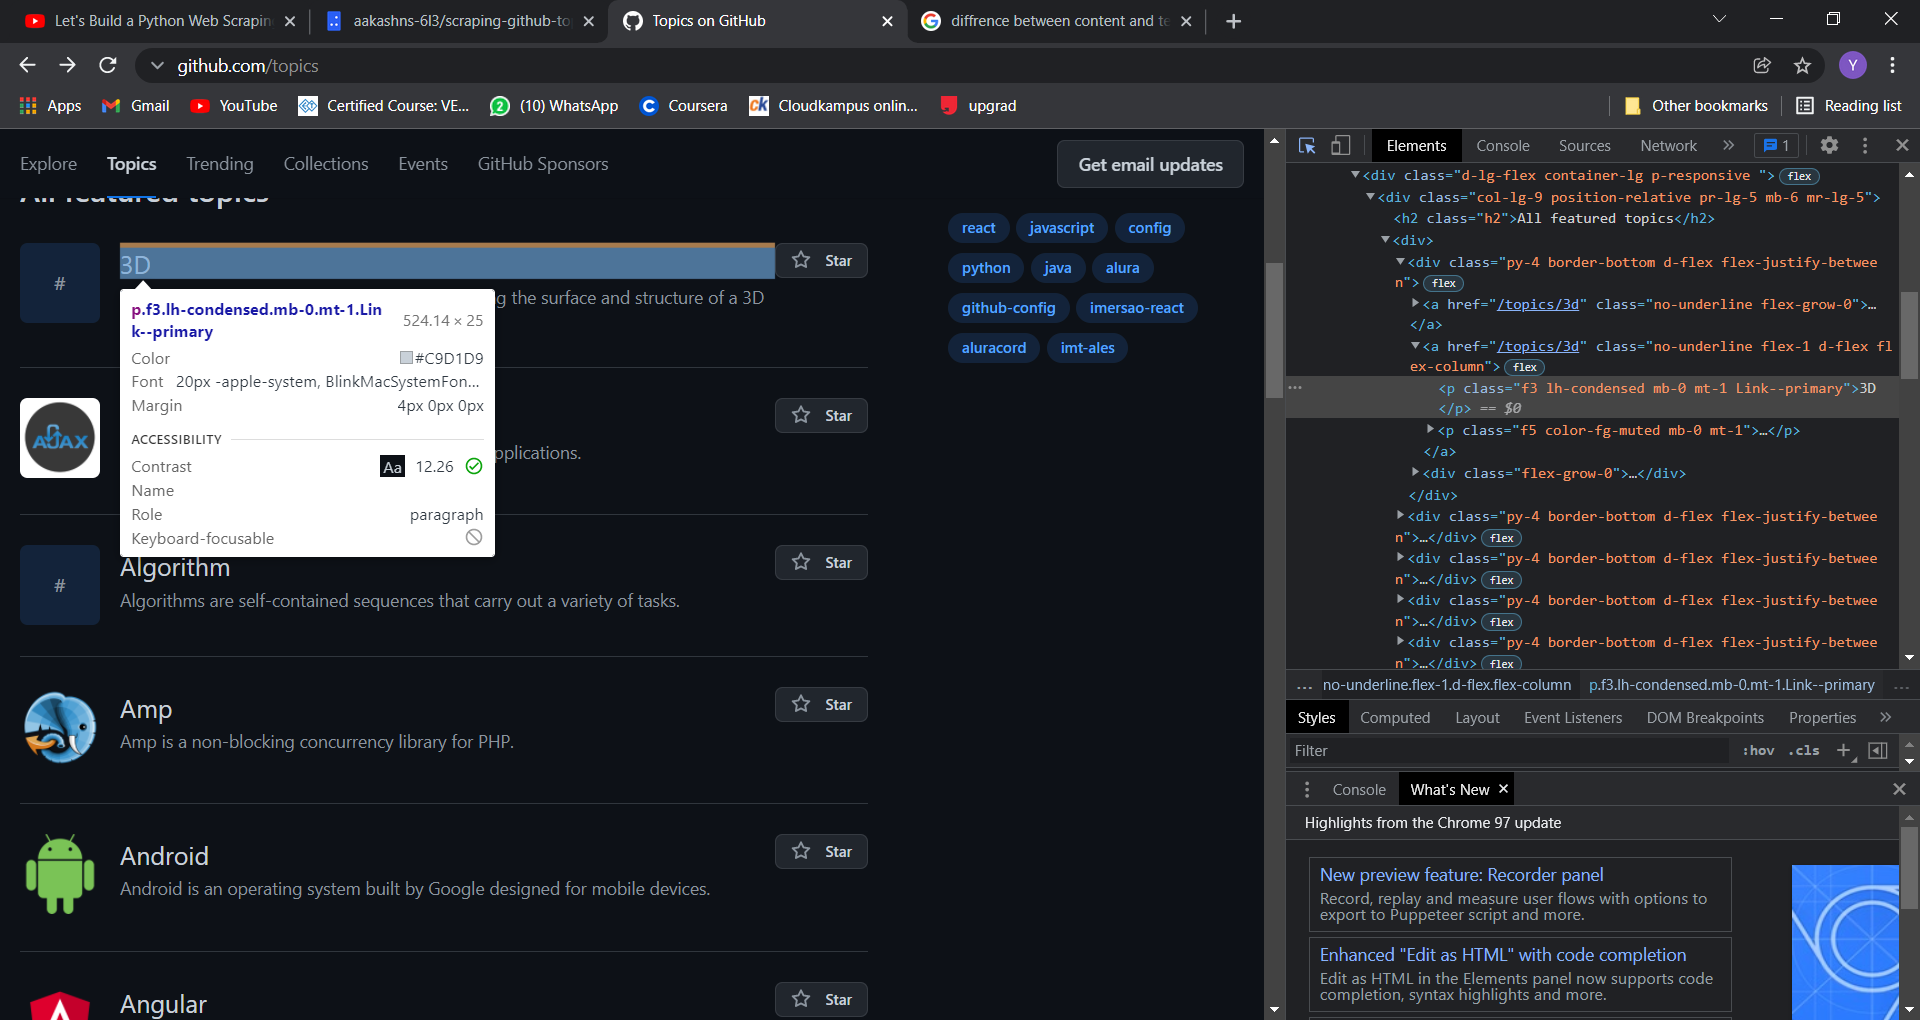

In [19]:
def get_topic_titles(doc):
    selection_class = "f3 lh-condensed mb-0 mt-1 Link--primary"
    topic_title = doc.find_all("p",{"class":selection_class})#this will give all the line of codes having p tag including specified class attribute.
    topic_titles = [tag.string.strip() for tag in topic_title]#this will parse out the text present inside the tag and take into a list.
    return topic_titles

In [46]:
len(get_topic_titles(doc)) # there are 30 elemtns in a list of title names

30

In [50]:
get_topic_titles(doc)

['3D',
 'Ajax',
 'Algorithm',
 'Amp',
 'Android',
 'Angular',
 'Ansible',
 'API',
 'Arduino',
 'ASP.NET',
 'Atom',
 'Awesome Lists',
 'Amazon Web Services',
 'Azure',
 'Babel',
 'Bash',
 'Bitcoin',
 'Bootstrap',
 'Bot',
 'C',
 'Chrome',
 'Chrome extension',
 'Command line interface',
 'Clojure',
 'Code quality',
 'Code review',
 'Compiler',
 'Continuous integration',
 'COVID-19',
 'C++']

Now since the topic titles have been parsed lets lookout for the description and URLs for the same.
Basically URLs are found inside anchor and image tags with href and src attributes respectively.


In [21]:
def get_topic_descs(doc):
    desc_selector = "f5 color-fg-muted mb-0 mt-1"
    desc_tag = doc.find_all("p",{"class":desc_selector})
    description = [tag.string.strip() for tag in desc_tag]
    return description

getting urls

In [22]:
def get_topic_urls(doc):
    url_selector = "no-underline flex-1 d-flex flex-column"
    url_tag = doc.find_all("a",{"class":url_selector})
    url_text = [tag.string for tag in url_tag]
    return url_text

In [53]:
def get_topic_url(doc):
    url_selector = "no-underline flex-1 d-flex flex-column"
    url_tag = doc.find_all("a",{"class":url_selector})
    base_url = "https://github.com"
    l = []
    for i in range(len(url_tag)):
        url_Text = base_url+url_tag[i]["href"]
        l.append(url_Text)
    return l

In [54]:
get_topic_url(doc)

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/atom',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compil

Now, we have succesfully got the topic anmes, desc and urls, Lets move forward and put all together in a single function for ease of use. And create a table out of this data.

In [55]:
def scrape_topics():
    topics_url = "https://github.com/topics"
    response = requests.get(topics_url)
    if response.status_code !=200:
        raise Exception("failed to laod the page")
    doc  = bs(response.content,"html.parser")
    topic_doc = {
        "title":get_topic_titles(doc),
        "description":get_topic_descs(doc),
        "urls":get_topic_url(doc)
    }
    df = pd.DataFrame(topic_doc)
    return df

In [58]:
scrape_topics().head()

,title,description,urls
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android


So, we succesfully extracted the data out of the page and stored it in form of dataframe. We can also do convert this into csv and store it using command `to_csv`.